In [1]:
cd C:\Riddhima\Harris\Year 2\Quarter 3\ML\Assignment 2

C:\Riddhima\Harris\Year 2\Quarter 3\ML\Assignment 2


In [87]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams
import seaborn as sb
from __future__ import division
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
from datetime import timedelta
import random
from scipy import optimize
import time
import seaborn as sns
#from mlfunctions import *
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.model_selection import cross_validate

### 1 Read Data

In [2]:
def read(filename):
    return pd.read_csv(filename)
    #data.head()


### 2 Data Exploration

In [3]:
#summary stats

def summary(dataname):
    return dataname.describe()

#checking correlation among variables

def corrmatrix(dataname):
    sb.heatmap(dataname.corr())
    return plt.show()

 

#### 3. Pre-process Data


In [4]:
#Checking for missing values

def missing(dataname):
    return dataname.isnull().sum()

#Imputing missing values with mean

def missing_impute1(dataname, variable):
    dataname[variable].fillna(dataname[variable ].mean(), inplace=True)
    
def missing_impute2(dataname, variable):
    dataname[variable] = dataname[variable].fillna(dataname[variable].mode().iloc[0])

#df[cols]=df[cols].fillna(df.mode().iloc[0])

#Dealing with outlier

def outlier(dataname,varname):
    low= .05
    high = .95
    cutoff= dataname[varname].quantile([low,high])
    print(cutoff)
    dataname[varname] = dataname.loc[(dataname[varname] > cutoff.loc[low]) & (dataname[varname] <cutoff.loc[high])]
  
 

#### 4 Generating features or predictors

In [5]:
#converting a continous variable into a discrete variable

#credit_data['age'] = pd.cut(credit_data['age'], 10)

def discrete(dataname, varnam, n):
    dataname[varnam] = pd.cut(dataname[varnam],n)

#Creating a binary or dummy variable

def dummy(dataname, varold, varnew, n):
    #varnew= 'varnew'
    #varold = 'varold'
    dataname[varnew] = (dataname[varold] >= n).astype(int)

def dummy1(dataname, varold, varnew):
    dataname[varnew] = (dataname[varold] == 'f').astype(int)

### 5. Building classifier for multiple classifiers

#### 6 Experiment with different parameters of these classifiers

In [6]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as roc_auc

In [7]:
#Logistic Regression

#'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]},

def lr_results_grid(penalty = ['l1','l2'],c= [0.00001,0.0001,0.001,0.01,0.1,1,10]):
    for pen in penalty:
        for c_val in c:
            logit = LogisticRegression(penalty = str(pen), C= c_val)
            logit.fit(X_train, Y_train)
            test_pred = logit.predict(X_test)
            train_pred = logit.predict(X_train)
            
            #evaluate accuracy
            train_acc = accuracy(Y_train, train_pred)
            test_acc = accuracy(Y_test, test_pred)
            
            #evaluate precision
            train_pre = precision(train_pred,Y_train)
            test_pre = precision(test_pred, Y_test)
            
            #evaluate recall
            train_recall = recall(train_pred,Y_train)
            test_recall = recall(test_pred, Y_test)
            
            #evaluate F1
            train_f1 = f1(train_pred,Y_train)
            test_f1 = f1(test_pred, Y_test)
            
            #evaluate roc_auc score
            train_roc_auc = roc_auc(y_score = train_pred, y_true = Y_train)
            test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)
            
            dict = {}
            dict['Penalty'] = pen
            dict['C'] = c_val
            dict['train_accuracy'] = train_acc
            dict['test_accuracy'] = test_acc
            dict['train_precision'] = train_pre
            dict['test_precision'] = test_pre
            dict['train_recall'] = train_recall
            dict['test_recall'] = test_recall
            dict['train_f1'] = train_f1
            dict['test_f1'] = test_f1
            dict['train_roc_auc'] = train_roc_auc
            dict['test_roc_auc'] = test_roc_auc
            
            results.append(dict)
            
            #converting list into dataframe
            results_outcome = pd.DataFrame(results)
        return results_outcome
                



In [111]:
lr_results_grid(penalty=['l1'])

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Algorithm,C,Criterion,Depth,Max feature,Min Samples Split,N_neighbors,Penalty,Weights,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,NaN,NaN,gini,1.0,sqrt,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
1,NaN,NaN,gini,1.0,sqrt,5.0,NaN,NaN,NaN,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
2,NaN,NaN,gini,1.0,sqrt,10.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
3,NaN,NaN,gini,1.0,log2,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
4,NaN,NaN,gini,1.0,log2,5.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
5,NaN,NaN,gini,1.0,log2,10.0,NaN,NaN,NaN,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
6,NaN,NaN,gini,3.0,sqrt,2.0,NaN,NaN,NaN,0.862089,0.336850,0.216474,0.758803,NaN,0.860297,0.326675,0.210197,0.732681,NaN
7,NaN,NaN,gini,3.0,sqrt,5.0,NaN,NaN,NaN,0.869565,0.450154,0.329985,0.707974,NaN,0.864303,0.427396,0.314107,0.668506,NaN
8,NaN,NaN,gini,3.0,sqrt,10.0,NaN,NaN,NaN,0.862495,0.417355,0.304370,0.663746,NaN,0.859949,0.413421,0.306114,0.636568,NaN
9,NaN,NaN,gini,3.0,log2,2.0,NaN,NaN,NaN,0.874035,0.501928,0.392265,0.696699,NaN,0.869493,0.483955,0.379564,0.667553,NaN


In [8]:
#KNN

#'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}

def knn_results_grid(n_neighbors = [1,5,10,25,50,100], weights = ['uniform','distance'],algorithm = ['auto','ball_tree','kd_tree']):
    for n in n_neighbors:
        for w in weights:
            for algo in algorithm:
                knn = KNeighborsClassifier(n_neighbors=n, weights = str(w), algorithm = str(algo))
                knn.fit(X_train, Y_train)
                test_pred = knn.predict(X_test)
                train_pred = knn.predict(X_train)
                
                # evaluate accuracy
                train_acc = accuracy(Y_train, train_pred)
                test_acc = accuracy(Y_test, test_pred)
                
                #evaluate precision
                train_pre = precision(train_pred,Y_train)
                test_pre = precision(test_pred, Y_test)
                
                #evaluate recall
                train_recall = recall(train_pred,Y_train)
                test_recall = recall(test_pred, Y_test)
                
                #evaluate F1
                train_f1 = f1(train_pred,Y_train)
                test_f1 = f1(test_pred, Y_test)
                
                #evaluate roc_auc score
                train_roc_auc = roc_auc(train_pred,Y_train)
                test_roc_auc = roc_auc(test_pred, Y_test)
                
                dict = {}
                dict['N_neighbors'] = n
                dict['Weights'] = weights
                dict['Algorithm'] = algo
                dict['train_accuracy'] = train_acc
                dict['test_accuracy'] = test_acc
                dict['train_precision'] = train_pre
                dict['test_precision'] = test_pre
                dict['train_recall'] = train_recall
                dict['test_recall'] = test_recall
                dict['train_f1'] = train_f1
                dict['test_f1'] = test_f1
                dict['train_roc_auc'] = train_roc_auc
                dict['test_roc_auc'] = test_roc_auc
                
                results.append(dict)
                
                #converting list into dataframe
                
                results_outcome = pd.DataFrame(results)
        return results_outcome 
    
    

In [100]:
knn_results_grid(n_neighbors=[5])

,Algorithm,C,Criterion,Depth,Max feature,Min Samples Split,N_neighbors,Penalty,Weights,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,NaN,NaN,gini,1.0,sqrt,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
1,NaN,NaN,gini,1.0,sqrt,5.0,NaN,NaN,NaN,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
2,NaN,NaN,gini,1.0,sqrt,10.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
3,NaN,NaN,gini,1.0,log2,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
4,NaN,NaN,gini,1.0,log2,5.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
5,NaN,NaN,gini,1.0,log2,10.0,NaN,NaN,NaN,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
6,NaN,NaN,gini,3.0,sqrt,2.0,NaN,NaN,NaN,0.862089,0.336850,0.216474,0.758803,NaN,0.860297,0.326675,0.210197,0.732681,NaN
7,NaN,NaN,gini,3.0,sqrt,5.0,NaN,NaN,NaN,0.869565,0.450154,0.329985,0.707974,NaN,0.864303,0.427396,0.314107,0.668506,NaN
8,NaN,NaN,gini,3.0,sqrt,10.0,NaN,NaN,NaN,0.862495,0.417355,0.304370,0.663746,NaN,0.859949,0.413421,0.306114,0.636568,NaN
9,NaN,NaN,gini,3.0,log2,2.0,NaN,NaN,NaN,0.874035,0.501928,0.392265,0.696699,NaN,0.869493,0.483955,0.379564,0.667553,NaN


In [109]:
#Decision Tree

#'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100], 'max_features': [None, 'sqrt','log2'],'min_samples_split': [2,5,10]}

def dt_parameter_grid(criterion = ['gini', 'entropy'], max_depths = [1, 3, 5, 7, 9], max_features = ['sqrt', 'log2'],min_samples_split = [2,5,10]):
    results = []
    for crit in criterion:
        for d in max_depths:
            for feature in max_features:
                for sample_split in min_samples_split:
                    dec_tree = DecisionTreeClassifier(criterion = crit, max_depth=d, max_features = feature, min_samples_split = sample_split)
                    dec_tree.fit(X_train, Y_train)
                    train_pred = dec_tree.predict(X_train)
                    test_pred = dec_tree.predict(X_test)
                    
                    # evaluate accuracy
                    train_acc = accuracy(train_pred, Y_train)
                    test_acc = accuracy(test_pred, Y_test)
                    #print("Accuracy score for different depth")
                    #print("Accuracy score for : Criterion: {} , Depth: {} , Max feature {} , Min Samples Split {} | Train acc: {:.2f} | Test acc : {:.2f}".format(crit, d, feature, sample_split, train_f1, train_acc, test_acc))
                    
                    #evaluate precision
                    train_pre = precision(train_pred,Y_train)
                    test_pre = precision(test_pred, Y_test)
                    #print("Precision score for different depth")
                    #print("Precision score for : Criterion: {} , Depth: {} , Max feature {} , Min Samples Split {} | Train precision: {:.2f} | Test precision: {:.2f}".format(crit, d, feature, sample_split, train_f1, train_pre, test_pre)
                    
                    #evaluate recall
                    train_recall = recall(train_pred,Y_train)
                    test_recall = recall(test_pred, Y_test)
                    #print("Recall score for different depth")
                    #print("Recall score for : Criterion: {} , Depth: {} , Max feature {} , Min Samples Split {}| Train recall: {:.2f} | Test recall: {:.2f}".format(crit, d, feature, sample_split, train_f1, train_recall, test_recall)
                    
                    #evaluate F1
                    train_f1 = f1(train_pred,Y_train)
                    test_f1 = f1(test_pred, Y_test)
                    #print("F1 score for different depth")
                    #print("F1 score for : Criterion: {} , Depth: {} , Max feature {} , Min Samples Split {} | Train f1: {:.2f} | Test f1: {:.2f}".format(crit, d, feature, sample_split, train_f1, test_f1))
                    #print("                                                              "
                    #print("-----------------------------------------------------------------------------------------------------")
                    
                    
                    #evaluate roc_auc score
                    #train_roc_auc = roc_auc(train_pred,Y_train)
                    #test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)
                    
                    dict = {}
                    dict['Criterion'] = crit
                    dict['Depth'] = d
                    dict['Max feature'] = feature
                    dict['Min Samples Split'] = sample_split
                    dict['train_accuracy'] = train_acc
                    dict['test_accuracy'] = test_acc
                    dict['train_precision'] = train_pre
                    dict['test_precision'] = test_pre
                    dict['train_recall'] = train_recall
                    dict['test_recall'] = test_recall
                    dict['train_f1'] = train_f1
                    dict['test_f1'] = test_f1
                    #dict['train_roc_auc'] = train_roc_auc
                    #dict['test_roc_auc'] = test_roc_auc
                    
                    results.append(dict)
                    
                    #converting list into dataframe
                    results_outcome = pd.DataFrame(results)
            return results_outcome
                
                
    
    

    #print("...............................................................")
    

In [110]:
dt_parameter_grid(criterion=['gini'])

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Criterion,Depth,Max feature,Min Samples Split,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
0,gini,1,sqrt,2,0.740353,0.000000,0.000000,0.000000,0.606483,0.000000,0.000000,0.000000
1,gini,1,sqrt,5,0.740353,0.000000,0.000000,0.000000,0.606483,0.000000,0.000000,0.000000
2,gini,1,sqrt,10,0.740353,0.000000,0.000000,0.000000,0.606483,0.000000,0.000000,0.000000
3,gini,1,log2,2,0.740353,0.000000,0.000000,0.000000,0.606483,0.000000,0.000000,0.000000
4,gini,1,log2,5,0.743684,0.511432,0.516684,0.506285,0.626356,0.505062,0.484461,0.527493
5,gini,1,log2,10,0.740353,0.000000,0.000000,0.000000,0.606483,0.000000,0.000000,0.000000


In [91]:
#SVM

def svm_results_grid(c_svm=[0.00001,0.0001,0.001,0.01,0.1,1,10]):
    for c in c_svm:
        svc = svm.SVC(C= c, kernel = 'linear')
        svc.fit(X_train, Y_train)
        train_pred = svc.predict(X_train)
        test_pred = svc.predict(X_test)

        # evaluate accuracy
        train_acc = accuracy(Y_train, train_pred)
        test_acc = accuracy(Y_test, test_pred)

        #evaluate precision
        train_pre = precision(train_pred,Y_train)
        test_pre = precision(test_pred, Y_test)

        #evaluate recall
        train_recall = recall(train_pred,Y_train)
        test_recall = recall(test_pred, Y_test)

        #evaluate F1
        train_f1 = f1(train_pred,Y_train)
        test_f1 = f1(test_pred, Y_test)

        #evaluate roc_auc score
        train_roc_auc = roc_auc(train_pred,Y_train)
        test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)

        dict = {}
        dict['C'] = c
        dict['train_accuracy'] = train_acc
        dict['test_accuracy'] = test_acc
        dict['train_precision'] = train_pre
        dict['test_precision'] = test_pre
        dict['train_recall'] = train_recall
        dict['test_recall'] = test_recall
        dict['train_f1'] = train_f1
        dict['test_f1'] = test_f1
        dict['train_roc_auc'] = train_roc_auc
        dict['test_roc_auc'] = test_roc_auc

        results.append(dict)

        #converting list into dataframe

        results_outcome = pd.DataFrame(results)
        
    return results_outcome.head()        
    
    

In [114]:
svm_results_grid(c_svm=[1])

,Algorithm,C,Criterion,Depth,Max feature,Min Samples Split,N_neighbors,Penalty,Weights,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,NaN,NaN,gini,1.0,sqrt,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
1,NaN,NaN,gini,1.0,sqrt,5.0,NaN,NaN,NaN,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
2,NaN,NaN,gini,1.0,sqrt,10.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
3,NaN,NaN,gini,1.0,log2,2.0,NaN,NaN,NaN,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
4,NaN,NaN,gini,1.0,log2,5.0,NaN,NaN,NaN,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN


In [11]:
#Random Forest

def rf_results_grid(n_estimators = [1,10,100,1000,10000], max_depth = [1,5,10,20,50,100], max_features = ['sqrt','log2'],min_samples_split = [2,5,10]):
    for n in n_estimators:
        for d in max_depth:
            for features in max_features:
                for split in min_samples_split:
                    rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features = features, min_samples_split = split)
                    rf.fit(X_train, Y_train)
                    train_pred = rf.predict(X_train)
                    test_pred = rf.predict(X_test)

                    # evaluate accuracy
                    train_acc = accuracy(Y_train, train_pred)
                    test_acc = accuracy(Y_test, test_pred)

                    #evaluate precision
                    train_pre = precision(train_pred,Y_train)
                    test_pre = precision(test_pred, Y_test)

                    #evaluate recall
                    train_recall = recall(train_pred,Y_train)
                    test_recall = recall(test_pred, Y_test)

                    #evaluate F1
                    train_f1 = f1(train_pred,Y_train)
                    test_f1 = f1(test_pred, Y_test)

                    #evaluate roc_auc score
                    train_roc_auc = roc_auc(y_score = train_pred, y_true = Y_train)
                    test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)
                    
                    dict = {}
                    dict['N_estimators'] = n
                    dict['Max Depth'] = d
                    dict['Max features'] = features
                    dict['Min Samples Split'] = split
                    dict['train_accuracy'] = train_acc
                    dict['test_accuracy'] = test_acc
                    dict['train_precision'] = train_pre
                    dict['test_precision'] = test_pre
                    dict['train_recall'] = train_recall
                    dict['test_recall'] = test_recall
                    dict['train_f1'] = train_f1
                    dict['test_f1'] = test_f1
                    dict['train_roc_auc'] = train_roc_auc
                    dict['test_roc_auc'] = test_roc_auc
                    
                    results.append(dict)
                    
                    #converting list into dataframe
                    results_outcome = pd.DataFrame(results)
            return results_outcome



In [104]:
rf_results_grid(n_estimators=[1])

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetr

,Max Depth,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,1,sqrt,2,1,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
1,1,sqrt,5,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
2,1,sqrt,10,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
3,1,log2,2,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
4,1,log2,5,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
5,1,log2,10,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
6,1,sqrt,2,1,0.743684,0.511432,0.516684,0.506285,0.669989,0.626356,0.505062,0.484461,0.527493,0.601443
7,1,sqrt,5,1,0.743684,0.511432,0.516684,0.506285,0.669989,0.626356,0.505062,0.484461,0.527493,0.601443
8,1,sqrt,10,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
9,1,log2,2,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000


In [12]:
#Gradient Boosting

def gb_results_grid(n_estimators = [1,10,100,1000,10000], learning_rate = [0.001,0.01,0.05,0.1,0.5], subsample = [0.1,0.5,1.0], max_depth = [1,3,5,10,20,50,100]):
    for n in n_estimators:
        for rate in learning_rate:
            for sample in subsample:
                for d in max_depth:
                    gb= GradientBoostingClassifier(n_estimators = n, learning_rate = rate, subsample = sample, max_depth = d)
                    gb.fit(X_train, Y_train)
                    train_pred = gb.predict(X_train)
                    test_pred = gb.predict(X_test)

                    # evaluate accuracy
                    train_acc = accuracy(Y_train, train_pred)
                    test_acc = accuracy(Y_test, test_pred)

                    #evaluate precision
                    train_pre = precision(train_pred,Y_train)
                    test_pre = precision(test_pred, Y_test)

                    #evaluate recall
                    train_recall = recall(train_pred,Y_train)
                    test_recall = recall(test_pred, Y_test)

                    #evaluate F1
                    train_f1 = f1(train_pred,Y_train)
                    test_f1 = f1(test_pred, Y_test)

                    #evaluate roc_auc score
                    train_roc_auc = roc_auc(y_score = train_pred, y_true = Y_train)
                    test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)

                    dict = {}
                    dict['N_estimators'] = n
                    dict['Learning Rate'] = rate
                    dict['subSample'] = sample
                    dict['Max Depth'] = d
                    dict['train_accuracy'] = train_acc
                    dict['test_accuracy'] = test_acc
                    dict['train_precision'] = train_pre
                    dict['test_precision'] = test_pre
                    dict['train_recall'] = train_recall
                    dict['test_recall'] = test_recall
                    dict['train_f1'] = train_f1
                    dict['test_f1'] = test_f1
                    dict['train_roc_auc'] = train_roc_auc
                    dict['test_roc_auc'] = test_roc_auc

                    results.append(dict)

                    #converting list into dataframe
                    results_outcome = pd.DataFrame(results)
        return results_outcome
                
                    

In [125]:
gb_results_grid(n_estimators=[10])

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Algorithm,C,Criterion,Depth,Learning Rate,Max Depth,Max feature,Max features,Min Samples Split,N_estimators,...,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,NaN,NaN,gini,1.0,NaN,NaN,sqrt,NaN,2.0,NaN,...,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
1,NaN,NaN,gini,1.0,NaN,NaN,sqrt,NaN,5.0,NaN,...,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
2,NaN,NaN,gini,1.0,NaN,NaN,sqrt,NaN,10.0,NaN,...,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
3,NaN,NaN,gini,1.0,NaN,NaN,log2,NaN,2.0,NaN,...,0.855912,0.383304,0.276745,0.623303,NaN,0.854237,0.382105,0.279542,0.603545,NaN
4,NaN,NaN,gini,1.0,NaN,NaN,log2,NaN,5.0,NaN,...,0.871109,0.475529,0.361125,0.696031,NaN,0.867229,0.457444,0.347159,0.670421,NaN
5,NaN,NaN,gini,1.0,NaN,NaN,log2,NaN,10.0,NaN,...,0.838196,0.000000,0.000000,0.000000,NaN,0.838773,0.000000,0.000000,0.000000,NaN
6,NaN,NaN,gini,3.0,NaN,NaN,sqrt,NaN,2.0,NaN,...,0.862089,0.336850,0.216474,0.758803,NaN,0.860297,0.326675,0.210197,0.732681,NaN
7,NaN,NaN,gini,3.0,NaN,NaN,sqrt,NaN,5.0,NaN,...,0.869565,0.450154,0.329985,0.707974,NaN,0.864303,0.427396,0.314107,0.668506,NaN
8,NaN,NaN,gini,3.0,NaN,NaN,sqrt,NaN,10.0,NaN,...,0.862495,0.417355,0.304370,0.663746,NaN,0.859949,0.413421,0.306114,0.636568,NaN
9,NaN,NaN,gini,3.0,NaN,NaN,log2,NaN,2.0,NaN,...,0.874035,0.501928,0.392265,0.696699,NaN,0.869493,0.483955,0.379564,0.667553,NaN


In [105]:
#Bagging Classifier

#BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)[source]¶

def bag_results_grid(n_estimators=[1,2,5,10], max_samples=[1,5]):
    for n in n_estimators:
        for sample in max_samples:
            bc = BaggingClassifier(n_estimators =n, max_samples = sample)
            bc.fit(X_train, Y_train)
            train_pred = bc.predict(X_train)
            test_pred = bc.predict(X_test)

            # evaluate accuracy
            train_acc = accuracy(Y_train, train_pred)
            test_acc = accuracy(Y_test, test_pred)

            #evaluate precision
            train_pre = precision(train_pred,Y_train)
            test_pre = precision(test_pred, Y_test)

            #evaluate recall
            train_recall = recall(train_pred,Y_train)
            test_recall = recall(test_pred, Y_test)

            #evaluate F1
            train_f1 = f1(train_pred,Y_train)
            test_f1 = f1(test_pred, Y_test)

            #evaluate roc_auc score
            train_roc_auc = roc_auc(y_score = train_pred, y_true = Y_train)
            test_roc_auc = roc_auc(y_score = test_pred, y_true = Y_test)

            dict = {}
            dict['N_estimators'] = n
            dict['Max Sample'] = sample
            dict['train_accuracy'] = train_acc
            dict['test_accuracy'] = test_acc
            dict['train_precision'] = train_pre
            dict['test_precision'] = test_pre
            dict['train_recall'] = train_recall
            dict['test_recall'] = test_recall
            dict['train_f1'] = train_f1
            dict['test_f1'] = test_f1
            dict['train_roc_auc'] = train_roc_auc
            dict['test_roc_auc'] = test_roc_auc

            results.append(dict)

            #converting list into dataframe
            results_outcome = pd.DataFrame(results)
        return results_outcome
            
            


In [106]:
bag_results_grid(n_estimators=[5])

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Max Depth,Max Sample,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,1.0,NaN,sqrt,2.0,1,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
1,1.0,NaN,sqrt,5.0,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
2,1.0,NaN,sqrt,10.0,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
3,1.0,NaN,log2,2.0,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
4,1.0,NaN,log2,5.0,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
5,1.0,NaN,log2,10.0,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
6,1.0,NaN,sqrt,2.0,1,0.743684,0.511432,0.516684,0.506285,0.669989,0.626356,0.505062,0.484461,0.527493,0.601443
7,1.0,NaN,sqrt,5.0,1,0.743684,0.511432,0.516684,0.506285,0.669989,0.626356,0.505062,0.484461,0.527493,0.601443
8,1.0,NaN,sqrt,10.0,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
9,1.0,NaN,log2,2.0,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000


In [14]:
cd C:\Riddhima\Harris\Year 2\Quarter 3\ML\Assignment 3 coding

C:\Riddhima\Harris\Year 2\Quarter 3\ML\Assignment 3 coding


In [15]:
ls

 Volume in drive C is OS
 Volume Serial Number is D680-E80D

 Directory of C:\Riddhima\Harris\Year 2\Quarter 3\ML\Assignment 3 coding

05/17/2018  08:18 PM    <DIR>          .
05/17/2018  08:18 PM    <DIR>          ..
05/17/2018  08:18 PM        36,703,235 outcomes.csv
05/17/2018  08:18 PM                22 outcomes.csv.zip
05/17/2018  08:18 PM       227,747,727 projects.csv
05/17/2018  08:18 PM                22 projects.csv.zip
               4 File(s)    264,451,006 bytes
               2 Dir(s)  718,753,009,664 bytes free


In [17]:
outcome = 'outcomes.csv'
project = 'projects.csv'

outcome_data = read(outcome)
project_data = read(project)

In [18]:
outcome_data.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [19]:
project_data.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [20]:
#filtering for dates between 2011-2013
#df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

project_data_subset = project_data[(project_data['date_posted'] >= '2011-01-01') & (project_data['date_posted'] <= '2013-12-31')]

In [21]:
project_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353151 entries, 44772 to 397922
Data columns (total 35 columns):
projectid                                 353151 non-null object
teacher_acctid                            353151 non-null object
schoolid                                  353151 non-null object
school_ncesid                             328293 non-null float64
school_latitude                           353151 non-null float64
school_longitude                          353151 non-null float64
school_city                               353151 non-null object
school_state                              353151 non-null object
school_zip                                353151 non-null float64
school_metro                              310130 non-null object
school_district                           352722 non-null object
school_county                             353151 non-null object
school_charter                            353151 non-null object
school_magnet                       

In [22]:
#selecting relevant variables

projects_data_subset2 = project_data_subset[['projectid', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise','teacher_teach_for_america', 'teacher_ny_teaching_fellow','primary_focus_subject','secondary_focus_subject','secondary_focus_area','resource_type','poverty_level','grade_level','fulfillment_labor_materials','total_price_excluding_optional_support','total_price_including_optional_support','students_reached','eligible_double_your_impact_match','eligible_almost_home_match','date_posted']]



In [23]:
projects_data_subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353151 entries, 44772 to 397922
Data columns (total 22 columns):
projectid                                 353151 non-null object
school_charter                            353151 non-null object
school_magnet                             353151 non-null object
school_year_round                         353151 non-null object
school_nlns                               353151 non-null object
school_kipp                               353151 non-null object
school_charter_ready_promise              353151 non-null object
teacher_teach_for_america                 353151 non-null object
teacher_ny_teaching_fellow                353151 non-null object
primary_focus_subject                     353116 non-null object
secondary_focus_subject                   237065 non-null object
secondary_focus_area                      237065 non-null object
resource_type                             353109 non-null object
poverty_level                           

In [24]:
#Data Exploration

summary(projects_data_subset2)

,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,353151.000000,353151.000000,353151.000000,353050.000000
mean,32.220311,531.372372,625.143964,94.187169
std,2.484309,844.069364,993.022780,156.987405
min,30.000000,37.030000,43.560000,1.000000
25%,30.000000,288.750000,339.710000,23.000000
50%,30.000000,427.270000,502.670000,31.000000
75%,35.000000,606.720000,713.790000,100.000000
max,35.000000,139725.410000,164382.840000,12143.000000


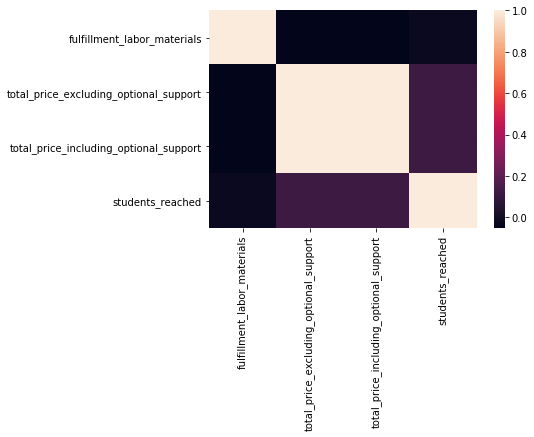

In [25]:
corrmatrix(projects_data_subset2)

In [26]:
projects_data_subset2.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
44772,62526d85d2a1818432d03d600969e99c,f,f,f,f,f,f,f,f,Special Needs,...,Other,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31
44773,33d59ac771b80222ad63ef0f4ac47ade,f,f,f,f,f,f,f,f,Mathematics,...,Supplies,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31
44774,1a3aaeffc56dd2a421e37d8298024c0a,f,f,f,f,f,f,f,f,Environmental Science,...,Technology,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31
44775,33aa19ee4da4c5adf47d0dfb84fab5ef,f,f,f,f,f,f,f,f,Literacy,...,Other,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31
44776,e31c0ea8b68f404699dfb0d39e9bc99b,f,t,f,f,f,f,f,f,Environmental Science,...,Supplies,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31


In [27]:
projects_data_subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353151 entries, 44772 to 397922
Data columns (total 22 columns):
projectid                                 353151 non-null object
school_charter                            353151 non-null object
school_magnet                             353151 non-null object
school_year_round                         353151 non-null object
school_nlns                               353151 non-null object
school_kipp                               353151 non-null object
school_charter_ready_promise              353151 non-null object
teacher_teach_for_america                 353151 non-null object
teacher_ny_teaching_fellow                353151 non-null object
primary_focus_subject                     353116 non-null object
secondary_focus_subject                   237065 non-null object
secondary_focus_area                      237065 non-null object
resource_type                             353109 non-null object
poverty_level                           

In [28]:
variables= ['school_charter','school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_teach_for_america','teacher_ny_teaching_fellow',\
           'eligible_double_your_impact_match','eligible_almost_home_match']
#,\
           #] #]
for v in variables:
    varnew = str(v)
    varold = str(v)
    dummy1(projects_data_subset2,varnew, varold)


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [29]:
projects_data_subset2['eligible_double_your_impact_match'].head()

44772    1
44773    1
44774    1
44775    1
44776    0
Name: eligible_double_your_impact_match, dtype: int32

In [30]:
missing(projects_data_subset2)

projectid                                      0
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_teach_for_america                      0
teacher_ny_teaching_fellow                     0
primary_focus_subject                         35
secondary_focus_subject                   116086
secondary_focus_area                      116086
resource_type                                 42
poverty_level                                  0
grade_level                                    6
fulfillment_labor_materials                    0
total_price_excluding_optional_support         0
total_price_including_optional_support         0
students_reached                             101
eligible_double_your_impact_match              0
eligible_almost_home

In [31]:
#imputing missing values

#students_reached
varname= 'students_reached'
missing_impute1(projects_data_subset2,varname)

#secondary_focus_subject and secondary_focus_area
varname1='secondary_focus_subject'
varname2='secondary_focus_area'
varname3 = 'primary_focus_subject'
varname4 = 'resource_type'
varname5 = 'grade_level'

missing_impute2(projects_data_subset2,varname1)
missing_impute2(projects_data_subset2,varname2)
missing_impute2(projects_data_subset2,varname3)
missing_impute2(projects_data_subset2,varname4)
missing_impute2(projects_data_subset2,varname5)

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [32]:
#taking care of outliers

outlier_var = ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached']

for v in outlier_var:
    var = str(v)
    outlier(projects_data_subset2,var)


0.05    30.0
0.95    35.0
Name: fulfillment_labor_materials, dtype: float64


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.05    162.870
0.95    986.065
Name: total_price_excluding_optional_support, dtype: float64
0.05     191.610
0.95    1160.075
Name: total_price_including_optional_support, dtype: float64
0.05     14.0
0.95    410.0
Name: students_reached, dtype: float64


In [33]:
projects_data_subset2['grade_level'].head()

44772       Grades 3-5
44773       Grades 3-5
44774       Grades 6-8
44775    Grades PreK-2
44776       Grades 6-8
Name: grade_level, dtype: object

#### Outcome Data: data exploration and pre-processing

In [34]:
#data exploration and data preprocessing for outcomes 

summary(outcome_data)

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00000,524928.000000,524928.000000
mean,52.92709,0.777339,4.361290
std,35.71410,2.227933,5.668748
min,0.00000,0.000000,0.000000
25%,25.00000,0.000000,1.000000
50%,50.00000,0.000000,3.000000
75%,83.00000,0.000000,5.000000
max,100.00000,151.000000,304.000000


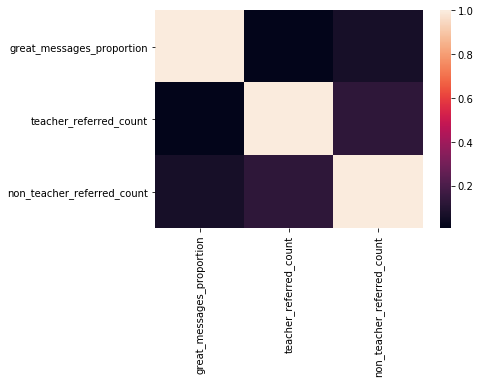

In [35]:
corrmatrix(outcome_data)

In [36]:
outcome_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619326 entries, 0 to 619325
Data columns (total 12 columns):
projectid                                         619326 non-null object
is_exciting                                       619326 non-null object
at_least_1_teacher_referred_donor                 524928 non-null object
fully_funded                                      619326 non-null object
at_least_1_green_donation                         524928 non-null object
great_chat                                        619326 non-null object
three_or_more_non_teacher_referred_donors         524928 non-null object
one_non_teacher_referred_donor_giving_100_plus    524928 non-null object
donation_from_thoughtful_donor                    524928 non-null object
great_messages_proportion                         439487 non-null float64
teacher_referred_count                            524928 non-null float64
non_teacher_referred_count                        524928 non-null float64
dtypes: fl

In [37]:
outcome_data.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [38]:
outcome_dummy = ['is_exciting', 'at_least_1_teacher_referred_donor','fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor']

for v in outcome_dummy:
    varold = str(v)
    varnew = str(v)
    dummy1(outcome_data,varold, varnew)

In [39]:
#takin care of outliers

outlier_var = ['great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count' ]

for out_v in outlier_var:
    var = str(out_v)
    outlier(outcome_data,var)
    

0.05      0.0
0.95    100.0
Name: great_messages_proportion, dtype: float64
0.05    0.0
0.95    5.0
Name: teacher_referred_count, dtype: float64
0.05     1.0
0.95    14.0
Name: non_teacher_referred_count, dtype: float64


In [40]:
final_data = pd.merge(projects_data_subset2,outcome_data)

In [41]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353151 entries, 0 to 353150
Data columns (total 33 columns):
projectid                                         353151 non-null object
school_charter                                    353151 non-null int32
school_magnet                                     353151 non-null int32
school_year_round                                 353151 non-null int32
school_nlns                                       353151 non-null int32
school_kipp                                       353151 non-null int32
school_charter_ready_promise                      353151 non-null int32
teacher_teach_for_america                         353151 non-null int32
teacher_ny_teaching_fellow                        353151 non-null int32
primary_focus_subject                             353151 non-null object
secondary_focus_subject                           353151 non-null object
secondary_focus_area                              353151 non-null object
resource_type        

In [42]:
#DCreating temporal validation function for the dataset

missing(final_data)

projectid                                              0
school_charter                                         0
school_magnet                                          0
school_year_round                                      0
school_nlns                                            0
school_kipp                                            0
school_charter_ready_promise                           0
teacher_teach_for_america                              0
teacher_ny_teaching_fellow                             0
primary_focus_subject                                  0
secondary_focus_subject                                0
secondary_focus_area                                   0
resource_type                                          0
poverty_level                                          0
grade_level                                            0
fulfillment_labor_materials                       353151
total_price_excluding_optional_support             35322
total_price_including_optional_

In [63]:
#test data

def test_data(enddate,n):
    train_date_cutoff= (pd.Timestamp(enddate) - pd.DateOffset(months=n))
    test_data= final_data[(final_data['date_posted'] > str(train_date)) & (final_data['date_posted'] <= enddate)]
    
    return test_data

#train data

def train_data(startdate,enddate,n):
    train_date_cutoff= (pd.Timestamp(enddate) - pd.DateOffset(months=n))
    train_data = final_data[(final_data['date_posted'] <= str(train_date)) & (final_data['date_posted'] >= startdate)]
    
    return train_data


    

In [68]:


#dependent variable

Y_test = test_data.ix[:,24].values
Y_train= train_data.ix[:,24].values
    
#indenpendent variables
    
X_test = test_data.ix[:, (1,2,3,4,5,6,7,8,19,20,22,23,25,26,27,28,29)].values
X_train = train_data.ix[:, (1,2,3,4,5,6,7,8,19,20,22,23,25,26,27,28,29)].values

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [100]:
# Function to calculate mean absolute error
def mae(Y_true, Y_pred):
    return np.mean(abs(Y_true - Y_pred))

baseline_guess = np.median(Y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(Y_test, baseline_guess))

#referenced: https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420

The baseline guess is a score of 0.00
Baseline Performance on the test set: MAE = 0.2596


#### MAE is mean absolute error. Here, this means that the baseline prediction is off by 26 points, or correctly predicts 74% times

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps


clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(BaggingClassifier())

for classifier in clfs:
    #pipeline = Pipeline(clfs)
    #pipeline.stpes
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, Y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            

            
#referenced:https://www.kaggle.com/gautham11/building-a-scikit-learn-classification-pipeline/code

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.720011631648
score_time  mean  0.0135099093119
test_score  mean  0.883988775809
train_score  mean  0.891181890522


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  30.1258223852
score_time  mean  7.81536181768
test_score  mean  0.900008376262
train_score  mean  0.904636260837


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
-----------------------------------
fit_time  mean  9.72483547529
score_time  mean  43.0806304614
test_score  mean  0.825354944088
train_score  mean  0.840243749215


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
-----------------------------------
fit_time  mean  0.173122723897
score_time  mean  0.0176796913147
test_score  mean  0.901390459438
train_score  mean  0.908384637936


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversion

---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----------------------------------
fit_time  mean  0.430305242538
score_time  mean  0.0528715451558
test_score  mean  0.90185115383
train_score  mean  0.908060057796


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
-----------------------------------
fit_time  mean  8.95887804031
score_time  mean  0.105409065882
test_score  mean  0.890564141224
train_score  mean  0.895087322528


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversion

---------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.996041615804
score_time  mean  0.110912640889
test_score  mean  0.900971646354
train_score  mean  0.908164761067


#### From the above analysis, when we test different models on accuracy metric, we can see Decision Tree, Random Forests, and Bagging performs better than the other models. And all of these models have an accuracy of 90 percent 

#### Based on the above analysis, I will focus on using these three models for further analysis

In [96]:
#Decision Tree

rf_results_grid()

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetr

,Max Depth,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,1,sqrt,2,1,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
1,1,sqrt,5,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
2,1,sqrt,10,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000
3,1,log2,2,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
4,1,log2,5,1,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
5,1,log2,10,1,0.740353,0.000000,0.000000,0.000000,0.500000,0.606483,0.000000,0.000000,0.000000,0.500000


In [111]:
result1 = dt_parameter_grid()
   

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [115]:
result1['classifier'] = 'Decision Tree'

In [120]:
result2= rf_results_grid()
result2['classifier'] = 'Decision Tree'

#result2.info()

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
Max Depth            30 non-null float64
Max Sample           2 non-null float64
Max features         30 non-null object
Min Samples Split    30 non-null float64
N_estimators         32 non-null int64
test_accuracy        32 non-null float64
test_f1              32 non-null float64
test_precision       32 non-null float64
test_recall          32 non-null float64
test_roc_auc         32 non-null float64
train_accuracy       32 non-null float64
train_f1             32 non-null float64
train_precision      32 non-null float64
train_recall         32 non-null float64
train_roc_auc        32 non-null float64
classifier           32 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 4.1+ KB


In [123]:
result3=bag_results_grid()
result3['classifier'] = 'Bagging'

#result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
Max Depth            30 non-null float64
Max Sample           8 non-null float64
Max features         30 non-null object
Min Samples Split    30 non-null float64
N_estimators         38 non-null int64
test_accuracy        38 non-null float64
test_f1              38 non-null float64
test_precision       38 non-null float64
test_recall          38 non-null float64
test_roc_auc         38 non-null float64
train_accuracy       38 non-null float64
train_f1             38 non-null float64
train_precision      38 non-null float64
train_recall         38 non-null float64
train_roc_auc        38 non-null float64
classifier           38 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 4.8+ KB


In [127]:
result_final = result1.append(result2)

In [128]:
result_final= result_final.append(result3)

In [132]:
#reordering column names

result_final = result_final[['classifier','Criterion',
 'Depth',
 'Max Depth',
 'Max Sample',
 'Max feature',
 'Max features',
 'Min Samples Split',
 'N_estimators',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_recall',
 'test_roc_auc',
 'train_accuracy',
 'train_f1',
 'train_precision',
 'train_recall',
 'train_roc_auc']]

In [135]:
result_final.sort_values(by=['test_accuracy'], ascending=False)

,classifier,Criterion,Depth,Max Depth,Max Sample,Max feature,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
13,Decision Tree,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
13,Bagging,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
0,Decision Tree,gini,1.0,NaN,NaN,sqrt,NaN,2.0,NaN,0.833652,0.546272,0.385670,0.936072,NaN,0.778469,0.615183,0.449979,0.972066,NaN
17,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
23,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
25,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
27,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
28,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
29,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
11,Bagging,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794


##### given the specifed parameters, Decision Tree perfroms the best with ~88 % accuracy, parameters max depth = 5, n_estimator = 5

In [136]:
result_final.sort_values(by=['test_precision'], ascending=False)

,classifier,Criterion,Depth,Max Depth,Max Sample,Max feature,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
36,Bagging,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.259647,0.412254,1.000000,0.259647,0.500000,0.393517,0.564782,1.000000,0.393517,0.500000
13,Decision Tree,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
13,Bagging,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
18,Bagging,NaN,NaN,1.0,NaN,NaN,log2,5.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
18,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,5.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
26,Bagging,NaN,NaN,1.0,NaN,NaN,sqrt,2.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
4,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,5.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
3,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
26,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,2.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105
4,Bagging,NaN,NaN,1.0,NaN,NaN,log2,5.0,1.0,0.599554,0.405492,0.525964,0.329923,0.575663,0.608347,0.540003,0.584185,0.502035,0.604105


##### Bagging performs best for precision metrics with 100 % precision which means there is something wrong in the model. the next best precision level is ~58% for decision tree. 

In [137]:
result_final.sort_values(by=['test_recall'], ascending=False)

,classifier,Criterion,Depth,Max Depth,Max Sample,Max feature,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,Decision Tree,gini,1.0,NaN,NaN,sqrt,NaN,2.0,NaN,0.833652,0.546272,0.385670,0.936072,NaN,0.778469,0.615183,0.449979,0.972066,NaN
15,Bagging,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
20,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
23,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
25,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
27,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
28,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
29,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
11,Bagging,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
14,Bagging,NaN,NaN,1.0,NaN,NaN,sqrt,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794


#### Decision Tree performs the best for recall metrics (93.6%) with parameters, depth =1. min_samples split = 2

In [138]:
result_final.sort_values(by=['test_f1'], ascending=False)

,classifier,Criterion,Depth,Max Depth,Max Sample,Max feature,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
13,Decision Tree,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
13,Bagging,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
0,Decision Tree,gini,1.0,NaN,NaN,sqrt,NaN,2.0,NaN,0.833652,0.546272,0.385670,0.936072,NaN,0.778469,0.615183,0.449979,0.972066,NaN
17,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
23,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
25,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
27,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
28,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
29,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
11,Bagging,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794


#### Decision Tree performs best with 71.4% value for f1 score, parameters: max_sample = 5, n_estimator = 5

In [139]:
result_final.sort_values(by=['test_roc_auc'], ascending=False)

,classifier,Criterion,Depth,Max Depth,Max Sample,Max feature,Max features,Min Samples Split,N_estimators,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
13,Bagging,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
13,Decision Tree,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,0.879983,0.714947,0.579666,0.932594,0.782486,0.848536,0.770052,0.644476,0.956408,0.812708
0,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
15,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
29,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
28,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
27,Decision Tree,NaN,NaN,1.0,NaN,NaN,sqrt,5.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
11,Bagging,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
25,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,10.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794
23,Decision Tree,NaN,NaN,1.0,NaN,NaN,log2,2.0,1.0,0.833652,0.546272,0.385670,0.936072,0.688217,0.778469,0.615183,0.449979,0.972066,0.720794


#### Decision Tree performs best with 78.2% value for f1 score, parameters: max_sample = 5, n_estimator = 5